**Consumo di alcol da parte degli studenti. EDA dettagliata e previsione del voto.**

I dati sono stati ottenuti in un'indagine sugli studenti dei corsi di matematica della scuola secondaria. Contiene molte interessanti informazioni sociali, di genere e di studio sugli studenti.

Gli obiettivi di questo studio sono:
1. Stimare i fattori che influenzano il voto degli studenti.
2. Stimare il livello di consumo di alcol tra gli studenti.
3. Costruire un modello di machine learning in grado di prevedere il voto degli studenti in base alle features disponibili.

Il set di dati originale è composto da due parti: studenti che studiano matematica e studenti che studiano la lingua portoghese. In questo Notebook considero solo la prima parte: gli studenti che studiano matematica.

Source - https://www.kaggle.com/uciml/student-alcohol-consumption

## Primo sguardo ai dati

Importiamo le librerie di cui avremo bisogno.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor

Ora creo un dataframe.

In [176]:
df = pd.read_csv('C:/Users/garif/Downloads/drunk exam/student-mat.csv')

In [177]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [179]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Il dataset include informazioni su 395 studenti.
2. Ci sono 33 features. La maggior parte di esse sono variabili categoriali. Alcune variabili sembrano numeriche, ma in realtà sono categoriche. Ad esempio, *Medu* - istruzione della madre (numerico: 0 - nessuna, 1 - istruzione primaria (4° grado), 2 – dal 5° al 9° grado, 3 – istruzione secondaria o 4 – istruzione superiore). Ci sono solo 5 features numeriche reali: *age*, *absences*, e grades (*G1*, *G2*, *G3* ).
3. Non ci sono valori mancanti.

## EDA

Innanzitutto, dobbiamo evidenziare gli obiettivi della nostra ricerca:
1. Comprendere quali features influenzano i voti degli studenti.
2. Valutare l'influenza del consumo di alcol sui voti.

### Familiarizzazione generale con i dati

In questo paragrafo, vorrei dare un'occhiata al target (grades), ad alcune features di base (*age*, *sex*, ecc.) e al livello di consumo di alcol per capire il set di dati che abbiamo. Prenderemo in considerazione diverse features (che possono influenzare l'obiettivo e il consumo di alcol in base alla mia opinione prevenuta) e la loro influenza sull'obiettivo e sul consumo di alcol.

#### Distribuzioni

Nel Dataset abbiamo studenti di 2 scuole diverse. Diamo un'occhiata a quanti studenti hanno.

In [180]:
print(type(df['school'].value_counts()))
print(type(df['school'].value_counts().to_frame()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [181]:
pd.concat([df['school'].value_counts().to_frame(), df['school'].value_counts(normalize=True).to_frame()], axis=1)

,school,school
GP,349,0.883544
MS,46,0.116456


L'88% degli studenti appartiene alla scuola Gabriel Pereira, L'11% appartiene alla scuola Mousinho da Silveira.

Diamo un'occhiata all'età degli studenti.

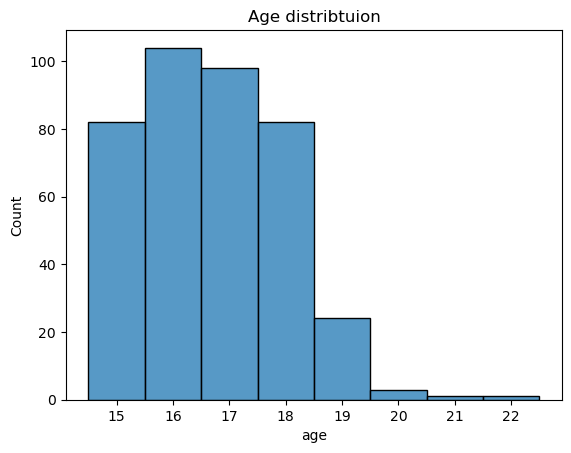

In [182]:
sns.histplot(df.age, bins=8, discrete=True)
plt.title('Age distribtuion')
plt.show()

L'età della maggioranza degli studenti è compresa tra i 15 ei 18 anni. Gli studenti più anziani hanno 22 anni.

Un'altra feature fondamentale è il *gender*.

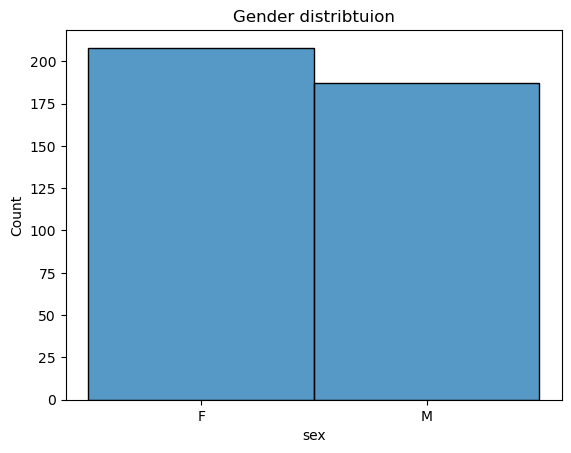

In [183]:
sns.histplot(df.sex)
plt.title('Gender distribtuion')
plt.show()

Nel Dataset, ci sono un po' più femmine che maschi.

Consideriamo ora la feature *Dalc*. Mostra un consumo di alcol durante la giornata lavorativa (da 1 - molto basso a 5 - molto alto).

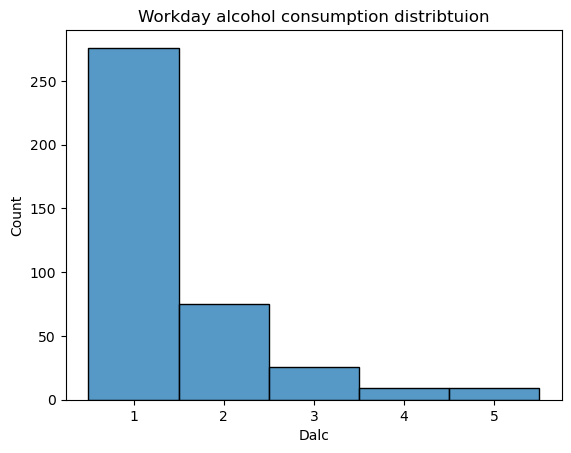

In [184]:
sns.histplot(df.Dalc, discrete=True)
plt.title('Workday alcohol consumption distribtuion')
plt.show()

In [185]:
df['Dalc'].value_counts(normalize=True)

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

Da ciò possiamo concludere che la maggior parte degli studenti (quasi il 70%) non beve alcol durante la settimana (1 su *Dalc* significa consumo molto basso. È strano che non ci sia scelta di 0 che significa "niente alcol". Poiché non è realistico presumere che ogni studente beva alcolici, in questo notebook considereremo "consumo molto basso" come "niente alcol"). Il 19% beve poco più di niente, il 2,5% beve molto durante la settimana .

Un'altra feature importante è *Walc* - il consumo di alcol durante il fine settimana.

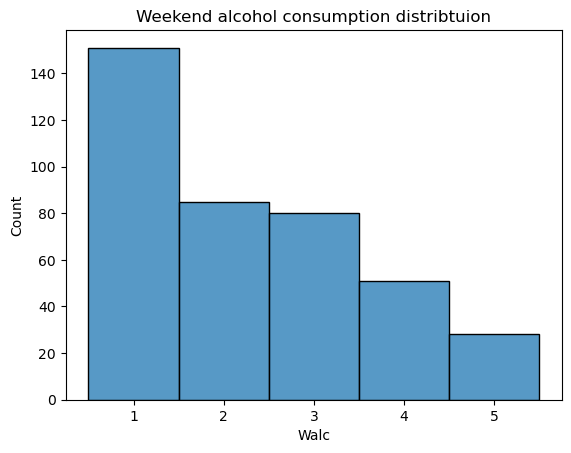

In [186]:
sns.histplot(df.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [187]:
df['Walc'].value_counts(normalize=True)

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

Qui la situazione cambia completamente. Sembra che gli studenti inizino a bere nel fine settimana.

Inoltre, è interessante vedere, **quanti studenti, che non bevono alcolici durante la settimana, bevono alcolici durante il fine settimana.**

In [188]:
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True)

1    0.543478
2    0.235507
3    0.152174
4    0.054348
5    0.014493
Name: Walc, dtype: float64

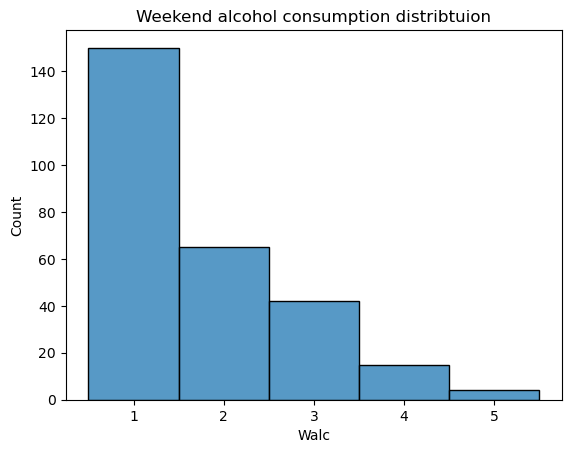

In [189]:
sns.histplot(df[df['Dalc'] == 1].Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

Più del 45%.

Un'altra feature interessante potrebbe essere *absences*.

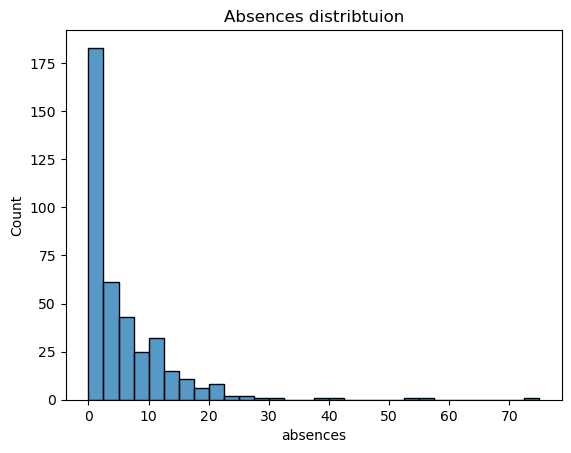

In [190]:
sns.histplot(df['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

In [191]:
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

La maggior parte degli studenti non ha molte assenze o ne ha 0. Ma ci sono alcuni studenti che hanno più di 30 assenze.

Ora possiamo andare al nostro obiettivo: i voti.

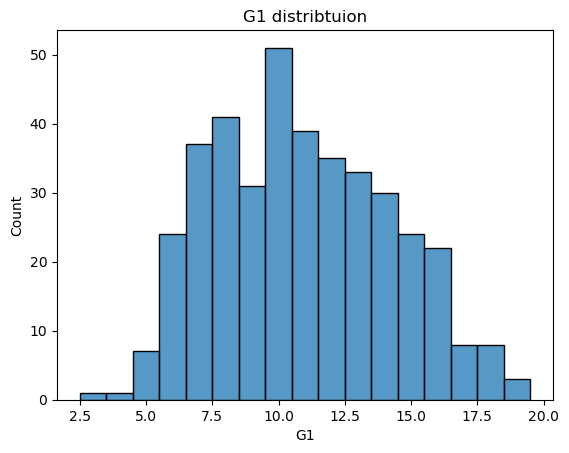

In [192]:
sns.histplot(df['G1'], discrete=True)
plt.title('G1 distribtuion')
plt.show()

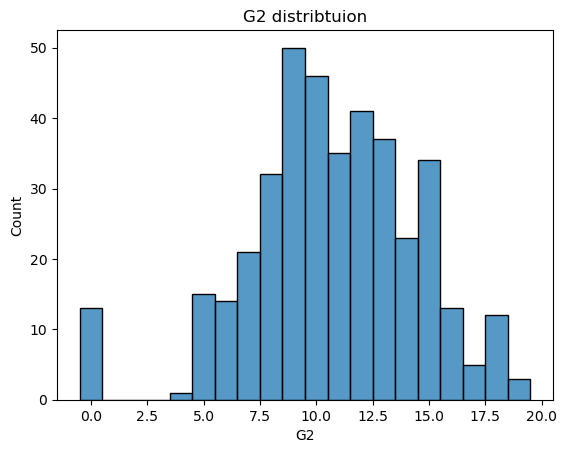

In [193]:
sns.histplot(df['G2'], discrete=True)
plt.title('G2 distribtuion')
plt.show()

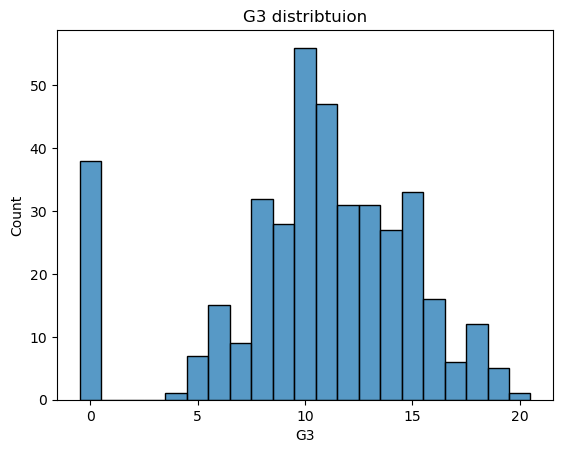

In [194]:
sns.histplot(df['G3'], discrete=True)
plt.title('G3 distribtuion')
plt.show()

Queste tre distribuzioni sono simili alla distribuzione normale. *G2* e *G3* hanno valori anomali in 0. Secondo https://www.scholaro.com/pro/Countries/Portugal/Grading-System, il voto più basso possibile in Portogallo è 1 Diamo un'occhiata agli studenti che hanno 0 voti.

In [195]:
df.query('G3 == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


Possiamo separare questi studenti in due gruppi:
1. Gli studenti del primo gruppo hanno *G2*, ma *G3* è 0. Potrebbero esserci valori mancanti o al momento della creazione del set di dati lo studente non aveva un voto a causa di alcune circostanze.
2. Gli studenti del secondo gruppo hanno zero in *G2*, e anche in *G3*. Possiamo supporre che questi studenti abbiano lasciato la scuola dopo il primo periodo.

Si può presumere che gli studenti di solito abbiano approssimativamente lo stesso voto nel primo e nel secondo periodo, così come il voto finale. Verifichiamo questa ipotesi.

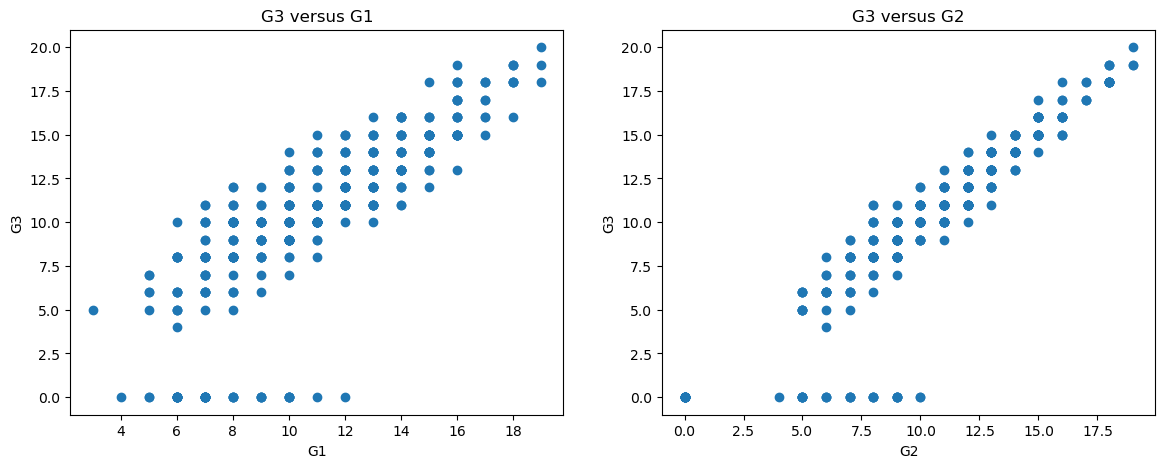

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data=df, x='G1', y='G3')
axes[0].set_title('G3 versus G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=df, x='G2', y='G3')
axes[1].set_title('G3 versus G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

Possiamo vedere chiaramente che i punti sono sparsi lungo la linea y=x, il che significa che la nostra ipotesi è corretta.

Per semplicità nel ragionamento futuro considereremo solo G1, e i risultati ottenuti possono essere applicati anche a G2 e G3.

#### Consumo di alcool

Diamo un'occhiata più da vicino al consumo di alcol tra gli studenti.

Prima di tutto, considereremo l'effetto del genere sul consumo di alcol.

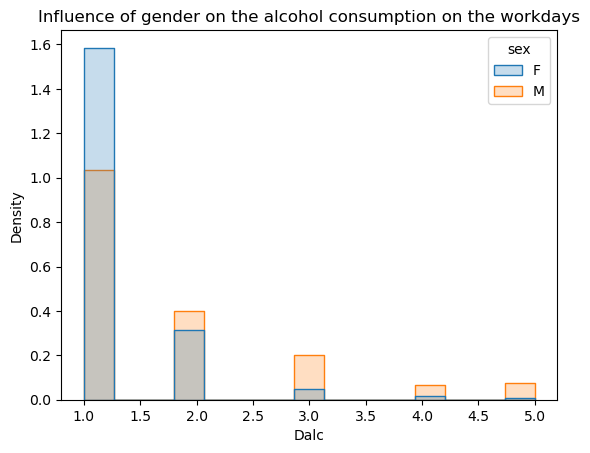

In [197]:
sns.histplot(data=df, x="Dalc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the workdays')
plt.show()

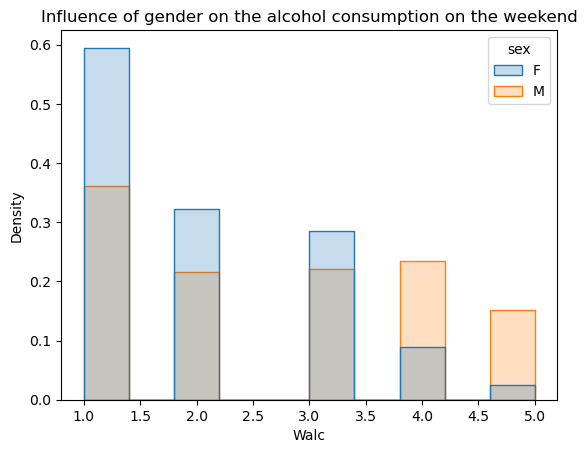

In [198]:
sns.histplot(data=df, x="Walc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the weekend')
plt.show()

In [199]:
df.groupby('sex')[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


Possiamo vedere chiaramente che i ragazzi bevono più delle ragazze, il che è prevedibile. Ed entrambi i gruppi bevono di più durante il fine settimana rispetto ai giorni feriali.

Ora esaminiamo l'influenza dell'età sul consumo di alcol.

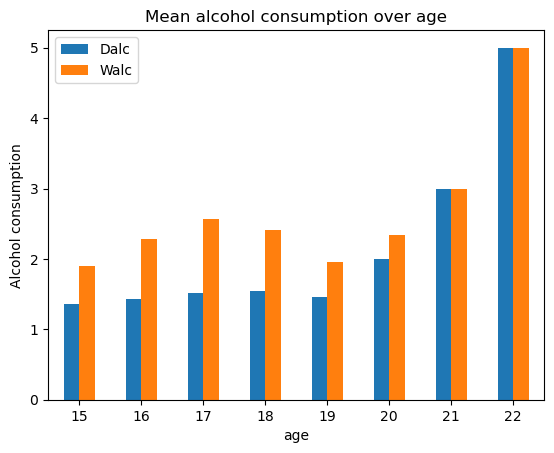

In [200]:
df.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0)
plt.title('Mean alcohol consumption over age')
plt.show()

Con l'aumentare dell'età, aumenta anche il consumo di alcol nel fine settimana che raggiunge il picco a 17 anni, poi diminuisce un po' e aumenta di nuovo in modo significativo a 20-22 anni. Ma, come ricordiamo dalla sezione precedente, abbiamo solo pochi studenti di età superiore ai 19 anni, quindi questi dati non sono rappresentativi per loro.

Possiamo riassumere in una tabella il consumo medio di alcol per ogni età e numero di studenti di questa età.

In [201]:
df.groupby('age')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
         mean count      mean count
age                                
15   1.353659    82  1.902439    82
16   1.432692   104  2.278846   104
17   1.520408    98  2.571429    98
18   1.548780    82  2.414634    82
19   1.458333    24  1.958333    24
20   2.000000     3  2.333333     3
21   3.000000     1  3.000000     1
22   5.000000     1  5.000000     1

Altre features che possono influenzare i consumi di alcol sono il tipo di luogo di residenza (urbano o rurale) e lo stato di convivenza dei genitori (conviventi o separati).

Cominciamo con il tipo di luogo di vita. Costruiamo una tabella che mostri i valori medi e il numero di studenti, quindi costruiamo le distribuzioni del consumo di alcol.

In [202]:
df.groupby('address')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
address                                
R        1.636364    88  2.534091    88
U        1.436482   307  2.221498   307

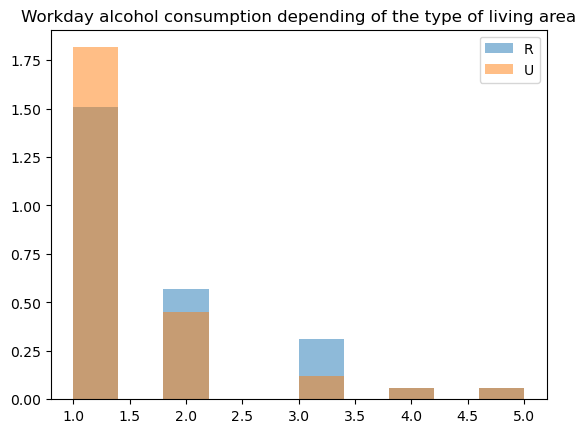

In [203]:
for group, data in df.groupby('address'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the type of living area')
plt.show()

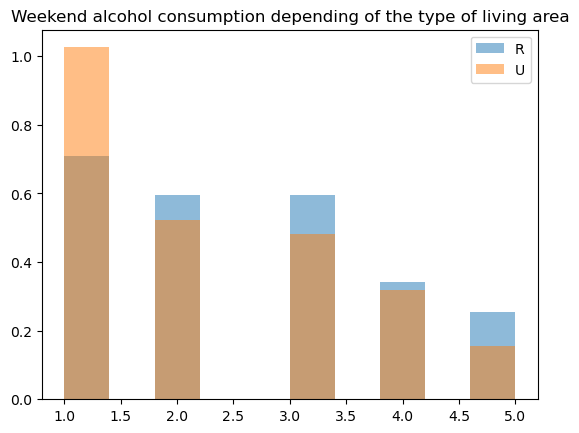

In [204]:
for group, data in df.groupby('address'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the type of living area')
plt.show()

Sembra che gli studenti che vivono in zone rurali consumino più alcol, ma il numero di questi studenti non è così alto. Per essere sicuri possiamo effettuare il test statistico.

Creo due campioni.

In [207]:
sample_R = df.query('address == "R"')['Walc']
sample_U = df.query('address == "U"')['Walc']

Imposto il livello di significatività a - 0,05.

Usererò t-test.

In [208]:
st.ttest_ind(sample_R, sample_U).pvalue

0.04457793151864655

Il valore P è inferiore al livello di significativo. Significa che la probabilità di prelevare questi campioni in modo casuale è bassa (a condizione che non vi sia alcuna differenza nel consumo di alcol) e possiamo concludere che la differenza è significativa. Gli studenti che vivono nelle aree rurali bevono più alcol degli studenti che vivono nelle aree urbane.

Ora possiamo considerare lo stato di convivenza del genitore.

Come nel caso precedente, verificheremo i valori medi, il numero di studenti in ciascun gruppo e quindi costruiremo le distribuzioni.

In [209]:
df.groupby('Pstatus')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
Pstatus                                
A        1.560976    41  2.268293    41
T        1.471751   354  2.293785   354

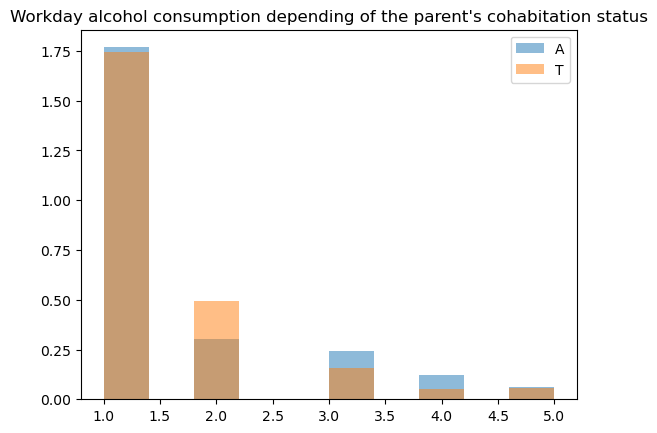

In [210]:
for group, data in df.groupby('Pstatus'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

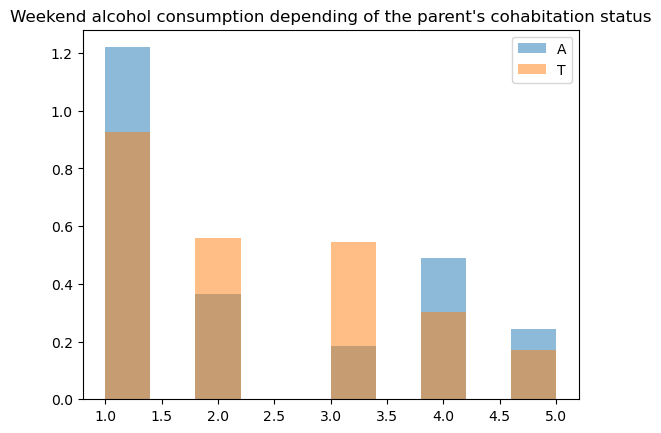

In [211]:
for group, data in df.groupby('Pstatus'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

Gli studenti i cui genitori vivono separati bevono un po' di più nei giorni feriali e un po' meno nel fine settimana rispetto a quelli i cui genitori vivono insieme. Tenendo conto del piccolo campione di studenti, i cui genitori vivono separati, non si può dire che la differenza sia significativa. Pertanto, lo stato di convivenza dei genitori non influisce sul consumo di alcol degli studenti.

#### Features che influenzano il voto

Come abbiamo detto nella sezione 2.1.1, considereremo solo G1.

Cominciamo con l'età. L'età influisce sul voto a scuola? Gli studenti ottengono voti migliori man mano che invecchiano o viceversa? Prenderemo in considerazione solo gli studenti di età inferiore ai 20 anni perché disponiamo di dati sufficienti su di loro.

Prima di tutto, verificheremo la distribuzione dei voti per ogni età.

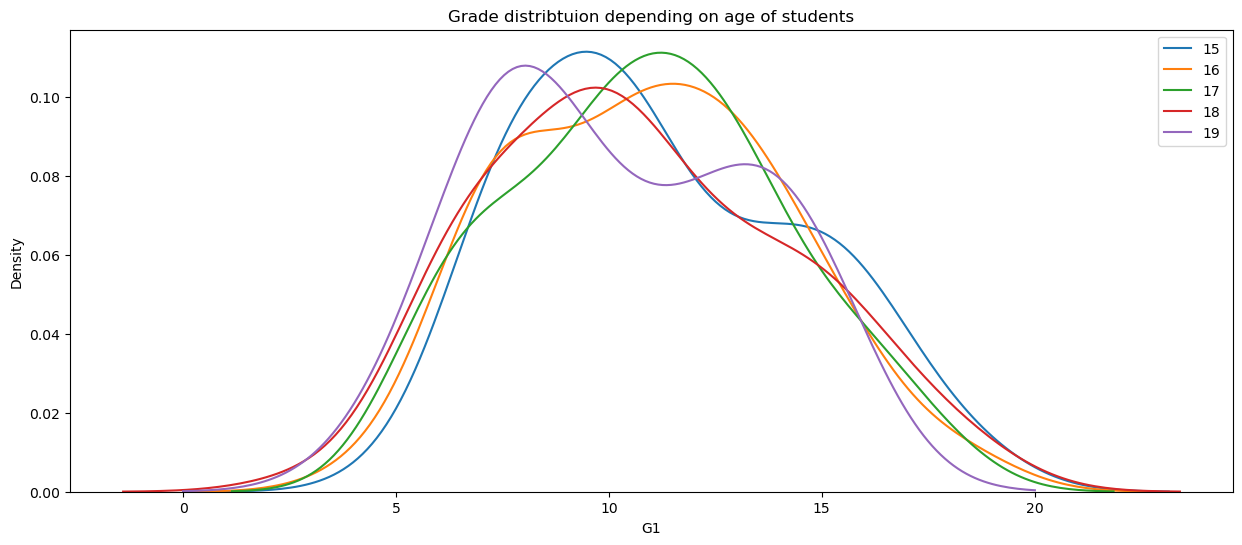

In [212]:
plt.figure(figsize=(15,6))
for age, grouped_data in df.groupby('age'):
    if age <= 19:
        sns.kdeplot(grouped_data['G1'], label=age)
plt.legend()
plt.title('Grade distribtuion depending on age of students')
plt.show()

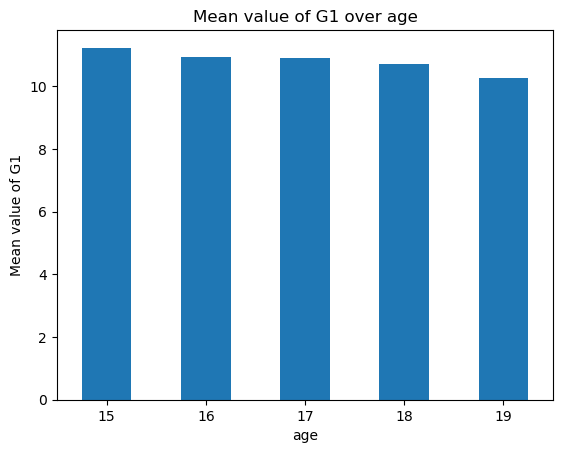

In [213]:
df.query('age <= 19').groupby('age')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over age')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

La distribuzione di G1 per età non differisce troppo. Il valore medio è leggermente decrescente. Verifichiamo se la differenza tra le età è significativa o meno applicando il test statistico.

Useremo t-test con un livello di significatività di 0,05

In [214]:
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 19')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 18')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 17')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 16')['G1'], equal_var=False).pvalue)

0.19327505866818148
0.34308506420662344
0.49815301469480167
0.5528168347429009


La differenza è insignificante, quindi possiamo concludere che l'età non influisce sul voto.

Ora possiamo passare al genere.

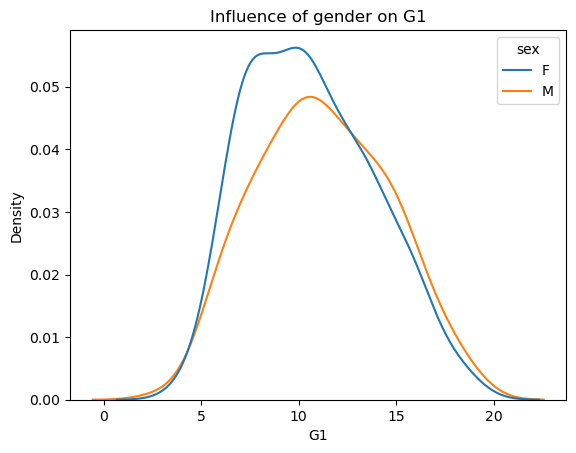

In [215]:
sns.kdeplot(data=df, x="G1", hue="sex")
plt.title('Influence of gender on G1')
plt.show()

In [216]:
df.groupby('sex')[['G1']].mean()

,G1
sex,
F,10.620192
M,11.229947


Le distribuzioni sono leggermente diverse e il valore medio per i maschi è più alto che per le femmine. La differenza non è abbastanza grande per essere sicuri, quindi applicheremo nuovamente il test statistico, vale a dire il test t con un livello di significatività di 0,05.

In [217]:
st.ttest_ind(df.query('sex == "M"')['G1'], df.query('sex == "F"')['G1'], equal_var=False).pvalue

0.06898106402330258

Il valore p è superiore al livello di significatività, quindi non abbiamo motivi sufficienti per rifiutare l'ipotesi nulla. Sulla base di ciò, possiamo concludere che la media G1 per maschi e femmine è la stessa. E possiamo dire che il genere non influisce sul voto.

Ora è il momento di considerare l'influenza del consumo di alcol sul voto.

Come nei casi precedenti, costruiremo distribuzioni e quindi confronteremo i valori medi.

Iniziamo con il consumo di alcol durante la giornata lavorativa.

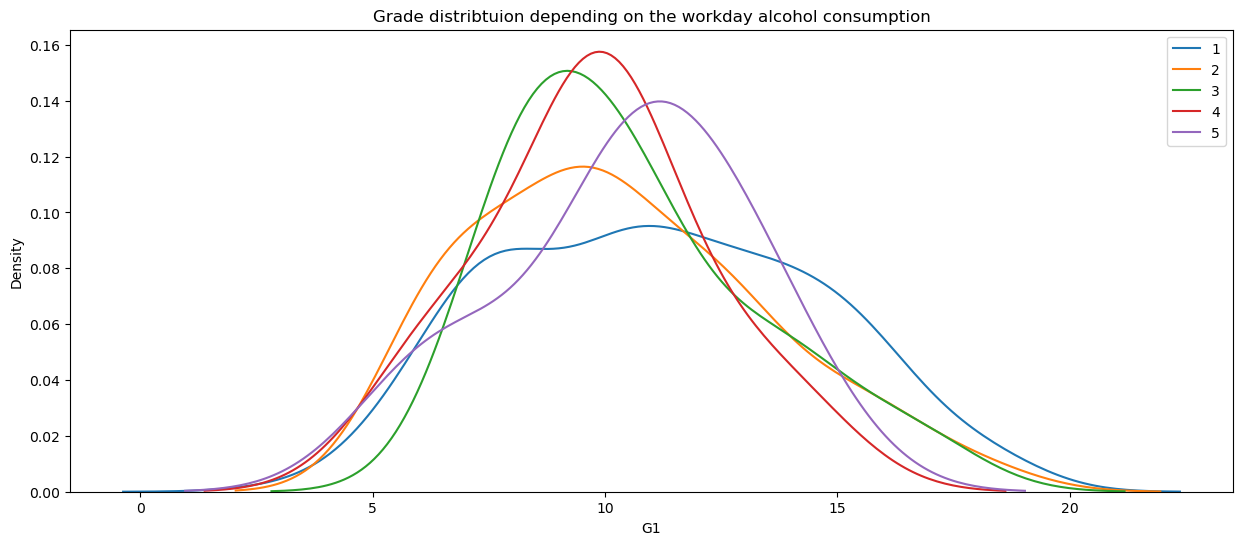

In [218]:
plt.figure(figsize=(15,6))
for dalc, grouped_data in df.groupby('Dalc'):
    sns.kdeplot(grouped_data['G1'], label=dalc)
plt.legend()
plt.title('Grade distribtuion depending on the workday alcohol consumption')
plt.show()

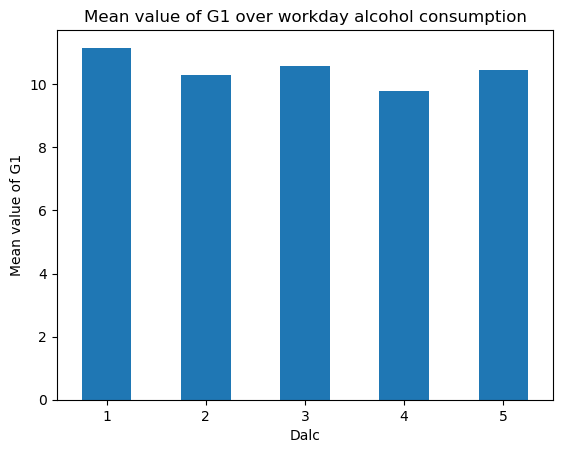

In [219]:
df.groupby('Dalc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over workday alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Le distribuzioni sono diverse. Per gli studenti che consumano una bassa quantità di alcol nei giorni lavorativi (o per niente), c'è un picco ampio, ma per gli studenti che consumano più alcol, questo picco è più ristretto. I valori medi sono leggermente diversi e gli studenti con il minor consumo di alcol hanno il voto medio più alto, ma i gruppi hanno dimensioni diverse e il nostro campione è relativamente piccolo, quindi non possiamo esserne sicuri. Torniamo al t test  con un livello di significatività di 0,05.

In [220]:
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 2')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 5')['G1'], equal_var=False).pvalue)

0.04323868914586449
0.3117327064366279
0.1275605526483468
0.446010208160306


Inoltre è utile dare un'occhiata alla dimensione del campione.

In [221]:
df.groupby('Dalc')['Dalc'].count().to_frame()

,Dalc
Dalc,
1,276
2,75
3,26
4,9
5,9


La differenza tra il primo e il secondo gruppo è significativa. Altre differenze non sono significative, ma possono essere causate dalla piccola dimensione dei gruppi con un consumo di alcol più elevato.

Quindi, tendo a presumere che il consumo di alcol durante la giornata lavorativa influisca sul voto e il minor consumo di alcol - il voto migliore.

Ora faremo la stessa procedura ma per il consumo di alcol nel fine settimana.

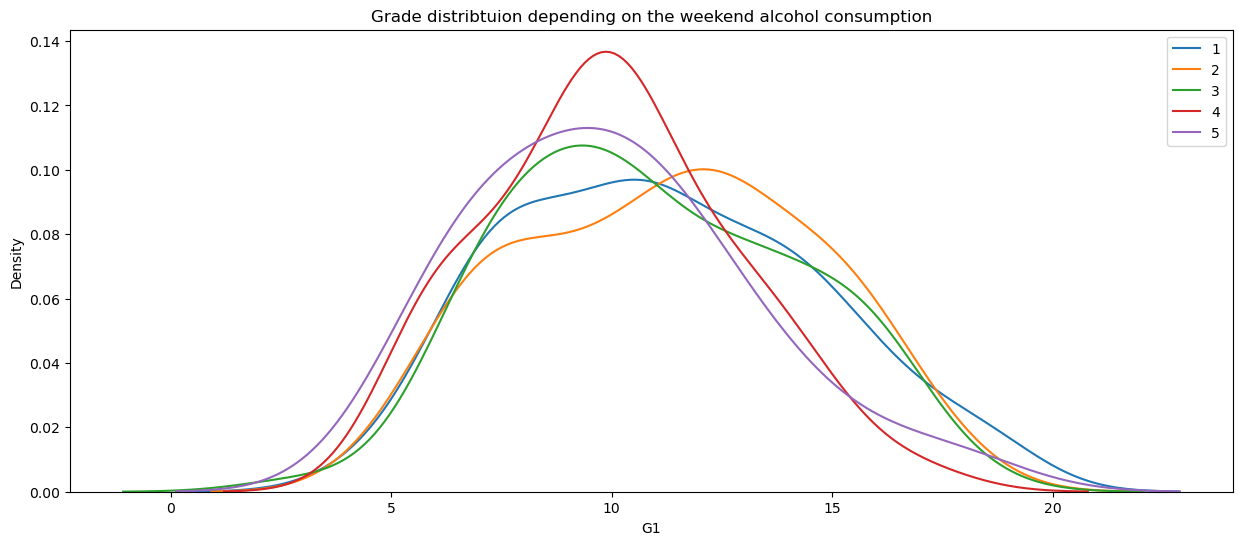

In [222]:
plt.figure(figsize=(15,6))
for walc, grouped_data in df.groupby('Walc'):
    sns.kdeplot(grouped_data['G1'], label=walc)
plt.legend()
plt.title('Grade distribtuion depending on the weekend alcohol consumption')
plt.show()

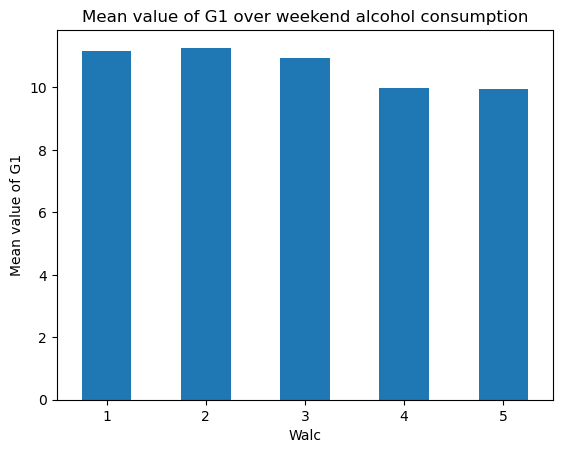

In [223]:
df.groupby('Walc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over weekend alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Qui abbiamo una situazione simile a quella che abbiamo avuto con il consumo di alcol durante la giornata lavorativa. Ancora una volta dobbiamo applicare il t test . Ora il gruppo 2 ha il valore medio più alto, quindi verrà confrontato con altri gruppi.

In [224]:
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 1')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 5')['G1'], equal_var=False).pvalue)

0.8413238345026541
0.5161450678698429
0.016162523265396612
0.06736401492389404


In [225]:
df.groupby('Walc')['Walc'].count().to_frame()

,Walc
Walc,
1,151
2,85
3,80
4,51
5,28


Nonostante il valore p nell'ultimo caso sia leggermente superiore al nostro livello di significatività, direi che l'elevato consumo di alcol durante il fine settimana porta a voti bassi a scuola. Gli studenti con un consumo di alcol basso e medio nel fine settimana hanno lo stesso voto.

#### Conclusioni

In questo paragrafo sono state brevemente esaminate diverse features e la loro influenza sul voto. Le conclusioni sono le seguenti:
1. L'età della maggior parte degli studenti nel set di dati è compresa tra 15 e 18 anni. Lo studente più anziano ha 22 anni.
2. La maggioranza degli studenti (quasi il 70%) non beve alcol durante la giornata lavorativa, il 19% beve poco più di niente, il 2,5% beve molto durante la giornata lavorativa.
3. La situazione del consumo di alcol cambia durante il fine settimana. Solo il 38% degli studenti non beve, il 22% beve poco, il 20% ha un consumo medio, il 13% - superiore alla media, il 7% - il consumo più alto.
4. I voti hanno distribuzioni simili alla distribuzione normale. Esiste una forte correlazione lineare tra voto del primo periodo, voto del secondo periodo e voto finale.
5. Gli studenti maschi consumano più alcol delle studentesse.
6. Con l'aumentare dell'età, aumenta anche il consumo di alcol nel fine settimana che raggiunge il suo picco a 17 anni.
7. Gli studenti che vivono nelle zone rurali bevono più alcol degli studenti che vivono nelle aree urbane.
8. L'età e il sesso non influiscono sul voto.
9. Il consumo di alcol influisce sul voto. Gli studenti, che hanno un elevato consumo di alcol, hanno voti inferiori.

### Importanza delle Feature

È molto importante capire quali features influenzano il target e quali no, ed è anche utile valutare in qualche modo la loro influenza. Nel paragrafo precedente, lo abbiamo fatto in modo stocastico: semplicemente considerando casualmente diverse features che potrebbero influenzare il target in base alla nostra conoscenza ed esperienza.

Ma abbiamo 30 features e sarebbe abbastanza problematico considerarle tutte con precisione. Tuttavia, c'è un modo per farlo in modo metodico e intelligente.

Stimerò l'importanza delle features e quindi verranno prese in considerazione con precisione solo le features più importanti.

Esistono diversi modi per stimare l'importanza delle features: analisi di correlazione, modelli di machine learning, ecc.

#### Analisi di correlazione

L'analisi di correlazione significa trovare una correlazione lineare tra variabili numeriche. Purtroppo abbiamo solo 2 variabili numeriche (*age* e *absences*), e nel nostro caso non ha senso applicare l'analisi di correlazione.

Ad ogni modo, calcoliamo la correlazione almeno per queste 2 features.

In [226]:
df[['age', 'absences', 'G1']].corr()

,age,absences,G1
age,1.000000,0.175230,-0.064081
absences,0.175230,1.000000,-0.031003
G1,-0.064081,-0.031003,1.000000


La correlazione è molto debole.

Inoltre, dobbiamo tenere presente che la correlazione tiene conto solo della dipendenza lineare. È il principale svantaggio dell'approccio.

#### Analisi dei coefficienti di regressione lineare

Se portiamo tutte le features alla stessa scala, siamo in grado di valutare l'importanza delle features in base ai coefficienti (pesi) del modello di regressione lineare.

Creiamo la matrice delle features e il vettore della variabile dipendente.

In [227]:
features_imp = df.copy().drop(['G1', 'G2', 'G3'], axis=1)
target_imp = df.copy()['G1']

In [228]:
print(features_imp.shape)
print(target_imp.shape)

(395, 30)
(395,)


Ora possiamo standardizzare le features numeriche.

In [229]:
scaler_num = StandardScaler()
features_imp[['age', 'absences']] = scaler_num.fit_transform(features_imp[['age', 'absences']])

Per l'encoding delle features categoriche verrà utilizzata la tecnica One Hot Encoding.

In [230]:
ohe_columns = []
for col in features_imp.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features_imp = pd.get_dummies(features_imp, drop_first=True, columns=ohe_columns)

In [231]:
features_imp.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,1.023046,0.036424,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238380,-0.213796,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.330954,0.536865,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.330954,-0.464016,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.546287,-0.213796,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


Le Features e il target sono preparati. Ora possiamo costruire il modello di Linear Regression.

In [232]:
linear_regressor = LinearRegression()
linear_regressor.fit(features_imp, target_imp)

LinearRegression()

Creiamo un dataframe contenente le Features e i loro weights.

In [233]:
feature_importances_lr_coef = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                         pd.Series(linear_regressor.coef_, name='weights')],
                                        axis=1)

In [234]:
feature_importances_lr_coef

,features,weights
0,age,-0.050109
1,absences,0.157432
2,school_MS,-0.106426
3,sex_M,0.918640
4,address_U,0.225349
...,...,...
64,Walc_5,0.377821
65,health_2,-0.816278
66,health_3,-1.050511
67,health_4,-0.979161


Il segno dei weights non è importante per noi, quindi possiamo usare i valori assoluti.

In [235]:
feature_importances_lr_coef['weights'] = abs(feature_importances_lr_coef['weights'])

Diamo un'occhiata alle 20 features (comprese le variabili fittizie, infatti ce ne saranno di meno), che hanno la maggiore influenza sul target.

In [236]:
feature_importances_lr_coef = feature_importances_lr_coef.sort_values(by='weights', ascending=False).reset_index(drop=True)

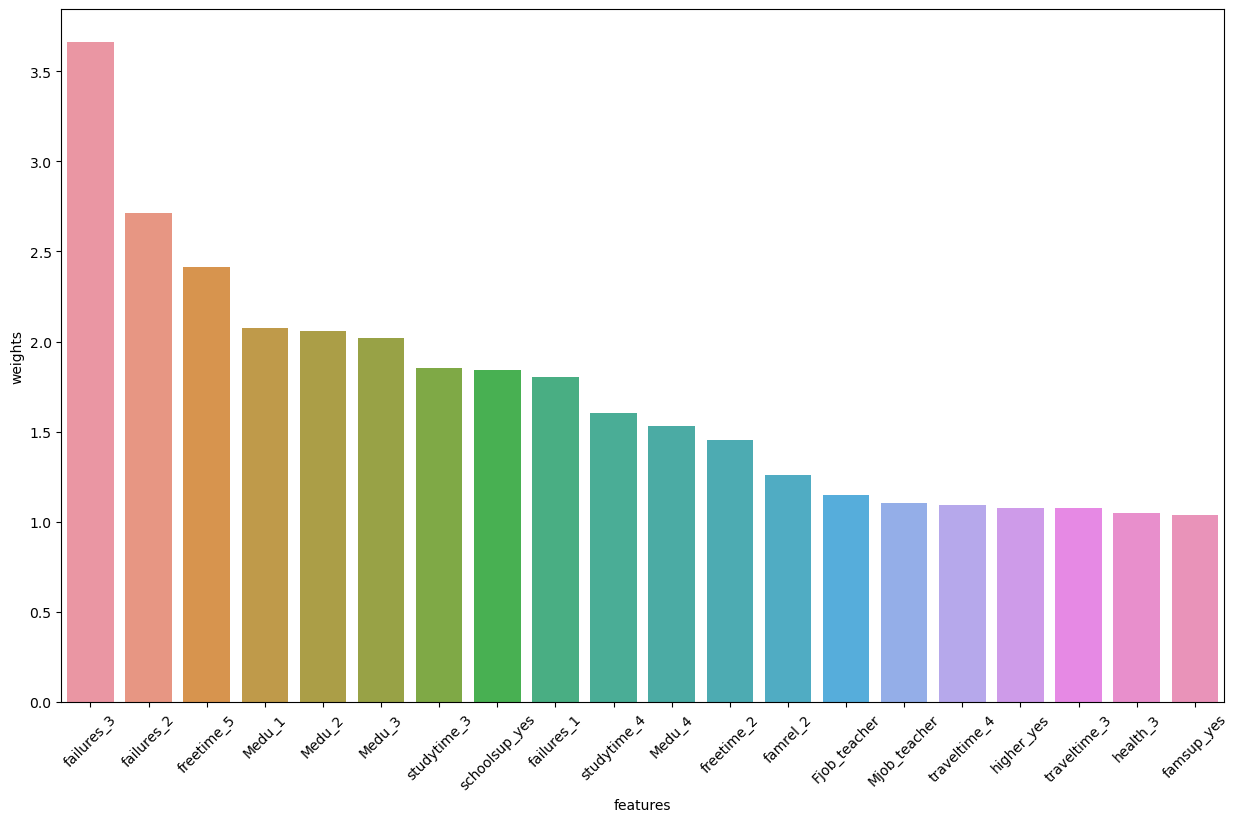

In [243]:
plt.figure(figsize=(15,9))
sns.barplot(data=feature_importances_lr_coef[:20], x='features', y='weights')
plt.xticks(rotation=45)
plt.show()

Combinando le variabili fittizie correlate in singole features, possiamo evidenziare le features più importanti:
1. *failures* - numero di errori passati della classe.
2. *freetime* - tempo libero dopo la scuola.
3. *Medu* - educazione della madre.
4. *tempo di studio* - tempo di studio settimanale.
5. *schoolsup* - supporto educativo extra.
6. *famrel* - qualità delle relazioni familiari.
7. *Fjob* - lavoro del padre (indipendentemente dal fatto che il padre sia insegnante o meno).
8. *Mjob* - lavoro della madre (indipendentemente dal fatto che la madre sia insegnante o meno).
9. *traveltime* - tempo di viaggio da casa a scuola.
10. *higher* - vuole frequentare un'istruzione superiore.
11. *health* - stato di salute attuale.
12. *famsup* - sostegno educativo alla famiglia.

#### Importanza delle Feature utilizzando Random Forest

Questo metodo si basa sull'attributo disponibile per RandomForestRegressor. La procedura è molto semplice: adattare il RandomForestRegressor e quindi chiamare l'attributo.

Useremo la stessa matrice di features, così come il vettore della variabile dipendente, come abbiamo usato nella sezione precedente.

Poiché RandomForestRegressor ha molti iperparametri da ottimizzare, dobbiamo trovare quelli ottimali. Verrà applicato GridSearchCV.

In [244]:
parameters = {'max_depth' : [8, 10, 12, 20],
              'n_estimators' : [200, 250, 300],
              'max_features' : [5, 25, 50],
              'min_samples_split' : [2, 4, 6]}
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)
grid_search.fit(features_imp, target_imp)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [8, 10, 12, 20],
                         'max_features': [5, 25, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_mean_squared_error')

In [245]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 25,
 'min_samples_split': 6,
 'n_estimators': 300}

Ora possiamo addestrare il modello.

In [246]:
regressor_rf = RandomForestRegressor(max_depth=12, n_estimators=300, max_features=25, min_samples_split=6, random_state=42)
regressor_rf.fit(features_imp, target_imp)

RandomForestRegressor(max_depth=12, max_features=25, min_samples_split=6,
                      n_estimators=300, random_state=42)

Creiamo un dataframe contenente le features e la loro importance.

In [247]:
feature_importances_rf = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                    pd.Series(regressor_rf.feature_importances_, name='importance')],
                                    axis=1).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [248]:
feature_importances_rf

,features,importance
0,absences,0.060971
1,schoolsup_yes,0.049489
2,failures_3,0.047631
3,age,0.032128
4,Medu_4,0.032069
...,...,...
64,Walc_5,0.006013
65,Fjob_health,0.002838
66,Dalc_5,0.001971
67,Dalc_4,0.001679


Come nella sezione precedente, diamo un'occhiata alle 20 features e combinando variabili fittizie in singole features verranno evidenziate le features più importanti

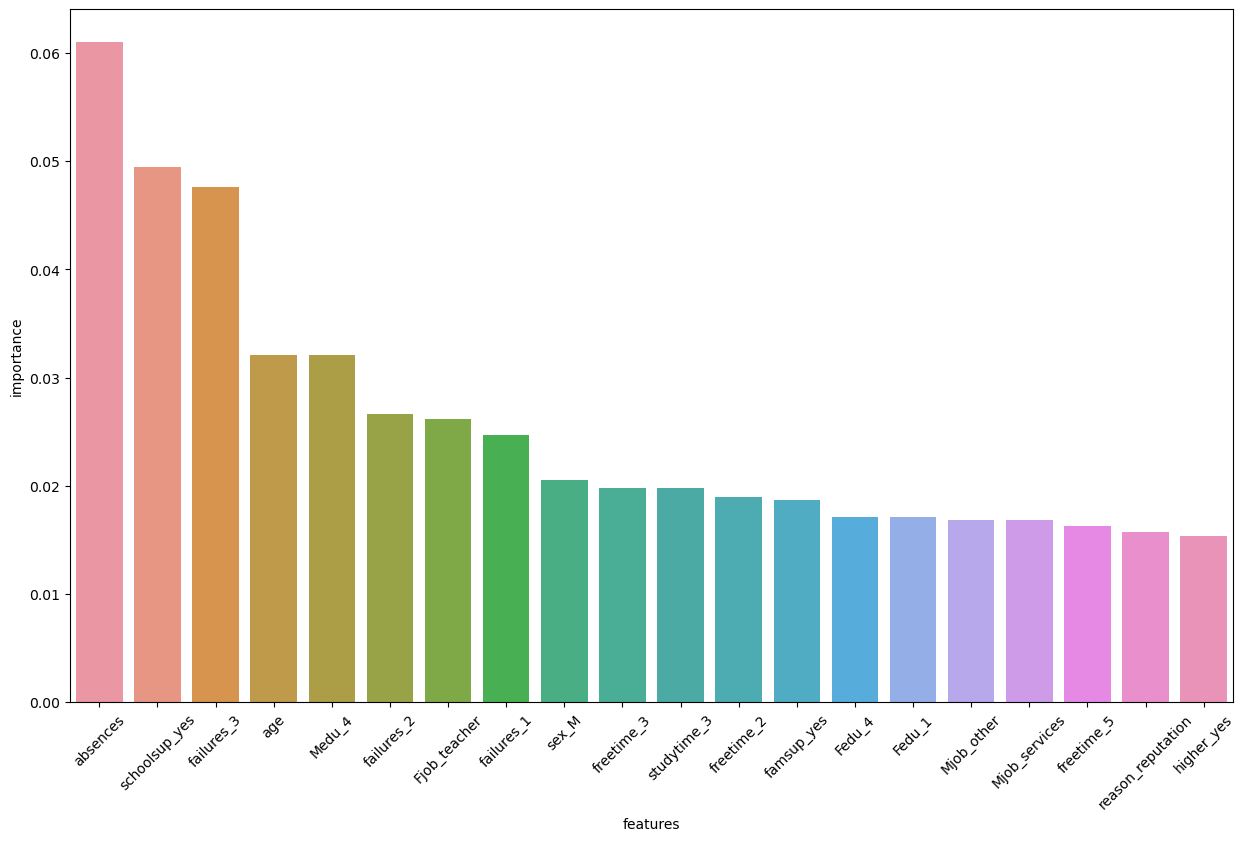

In [249]:
plt.figure(figsize=(15,9))
sns.barplot(data=feature_importances_rf[:20], x='features', y='importance')
plt.xticks(rotation=45)
plt.show()

Le features più importanti basate sulla Random Forest:
1. *absences* - numero di assenze scolastiche.
2. *schoolsup* - supporto educativo extra.
3. *failures* - numero di fallimenti passati della classe.
4. *age*.
5. *Medu* - educazione della madre.
6. *Fjob* - lavoro del padre (indipendentemente dal fatto che il padre sia insegnante o meno).
7. *sex*.
8. *freetime* - tempo libero dopo la scuola.
9. *studytime* - tempo di studio settimanale.
10. *famsup* - sostegno educativo alla famiglia.
11. *Fedu* - educazione del padre.
12. *Mjob* - lavoro di mamma.
13. *reason* - motivo per scegliere questa scuola.
14. *higher* - vuole frequentare un'istruzione superiore.

#### Conclusioni
In questo paragrafo, l'importanza delle features è stata definita utilizzando diversi approcci. Sono state ottenute le seguenti conclusioni:
1. L'analisi di correlazione non è applicabile perché la maggior parte delle features è categoriale.
2. Sulla base dell'analisi dei coefficienti di linear regression, le prime 5 features che hanno la maggiore influenza sul target sono le seguenti: *failures*, *freetime*, *Medu*, *studytime*, *schoolsup*
3. Sulla base di Random Forest, le prime 5 features che hanno la maggiore influenza sul target sono le seguenti: *absences*, *schoolsup*, *failures*, *age*, *Medu*.
4. Entrambi gli algoritmi concordano su *failures*, *freetime*, *Medu* and *schoolsup*, ma ci sono alcune contraddizioni: mentre Random Forest considera *age*, *absences* and *sex* features importanti, i pesi di queste features nella linear regression sono piccoli. Questo dovrebbe essere chiarito nel passaggio successivo. Le Features importanti di entrambi gli algoritmi dovrebbero essere studiate in dettaglio.

### Esame dettagliato delle Features importanti

In questo paragrafo daremo un'occhiata più da vicino alle features importanti evidenziate nel paragrafo precedente.

Diamo un'occhiata ai *failures*

#### Number of past class failures

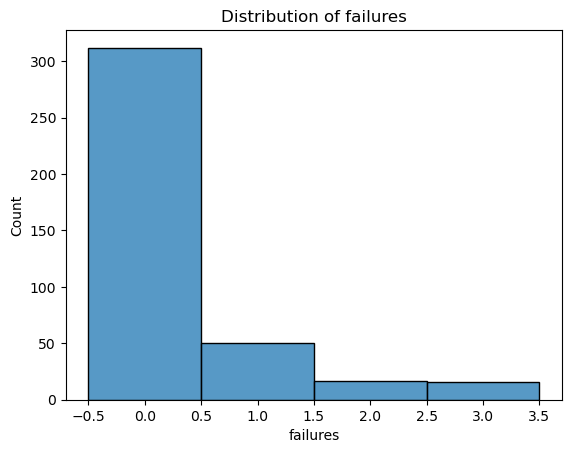

,failures
0,0.789873
1,0.126582
2,0.043038
3,0.040506


In [250]:
sns.histplot(df['failures'], discrete=True)
plt.title('Distribution of failures')
plt.show()
df['failures'].value_counts(normalize=True).to_frame()

Il 79% degli studenti non ha avuto precedenti bocciature in classe. Diamo un'occhiata a come questo fatto influisce sul voto. Separeremo il set di dati in base al numero di precedenti insuccessi di classe e creeremo una distribuzione del voto per loro.

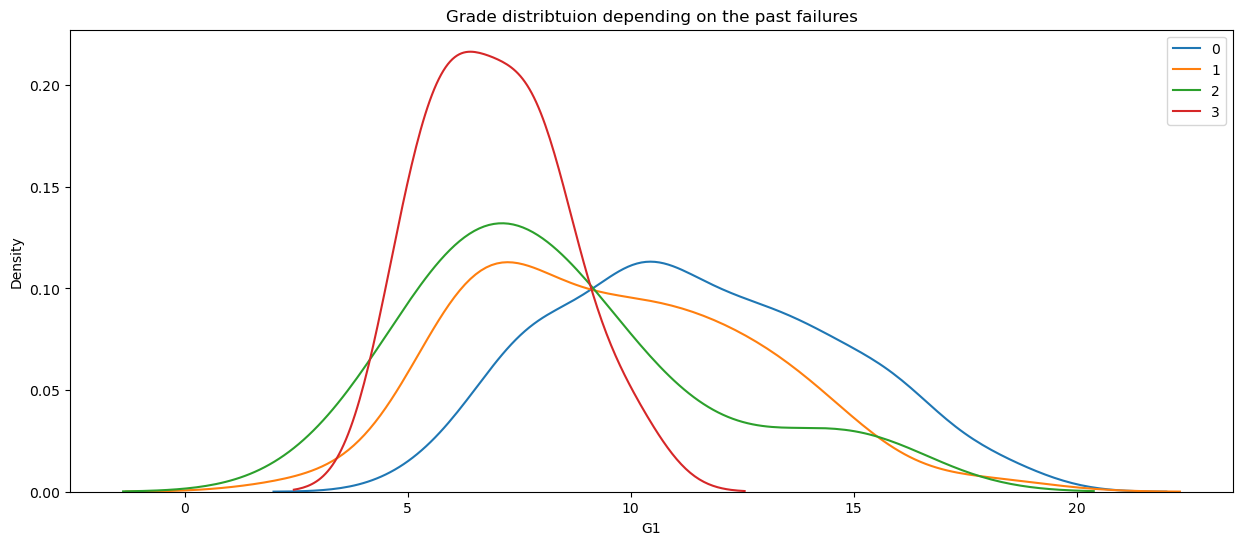

In [251]:
plt.figure(figsize=(15,6))
for failures, grouped_data in df.groupby('failures'):
    sns.kdeplot(grouped_data['G1'], label=failures)
plt.legend()
plt.title('Grade distribtuion depending on the past failures')
plt.show()

Sulla base delle distribuzioni, possiamo vedere chiaramente che gli studenti, che non hanno precedenti bocciature in classe, hanno il voto migliore. Significa che nel passaggio precedente entrambi gli algoritmi erano corretti per quanto riguarda l'importanza di questa feature.

#### Tempo libero dopo la scuola

Un'altra feature importante, riconosciuta da entrambi gli algoritmi, è il *freetime* (tempo libero dopo la scuola (da 1 - molto basso a 5 - molto alto)).

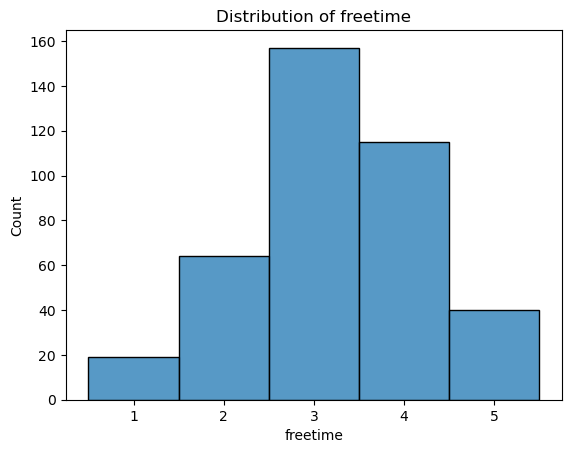

,freetime
3,0.397468
4,0.291139
2,0.162025
5,0.101266
1,0.048101


In [252]:
sns.histplot(df['freetime'], discrete=True)
plt.title('Distribution of freetime')
plt.show()
df['freetime'].value_counts(normalize=True).to_frame()

Sembra una distribuzione normale. Il 5% degli studenti ha poco tempo libero, il 10% degli studenti ne ha molto. Diamo un'occhiata a come influisce sul bersaglio.

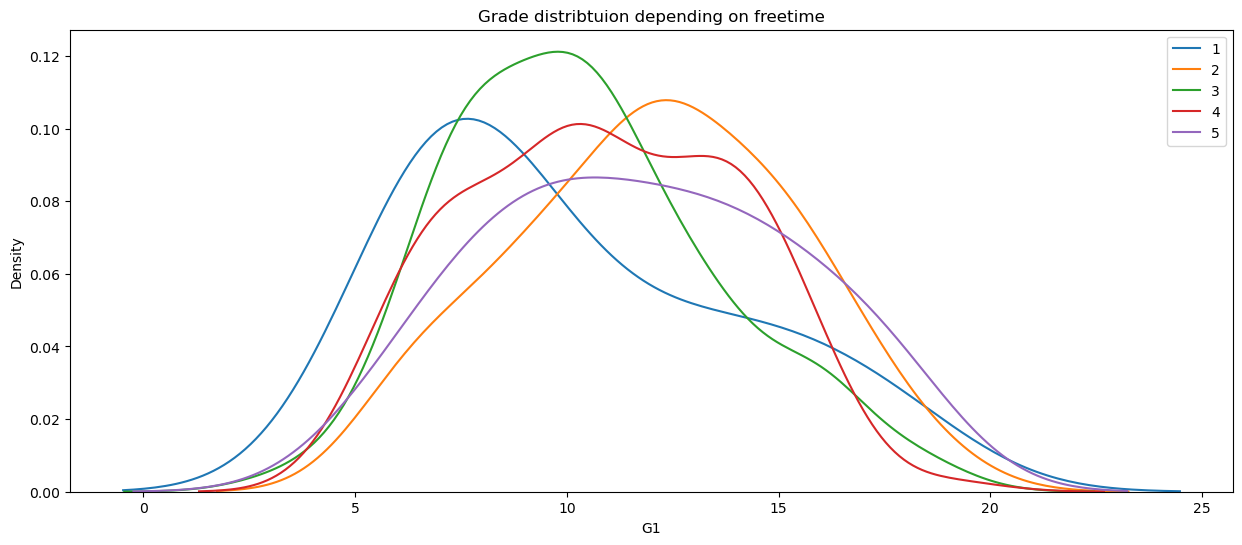

In [253]:
plt.figure(figsize=(15,6))
for freetime, grouped_data in df.groupby('freetime'):
    sns.kdeplot(grouped_data['G1'], label=freetime)
plt.legend()
plt.title('Grade distribtuion depending on freetime')
plt.show()

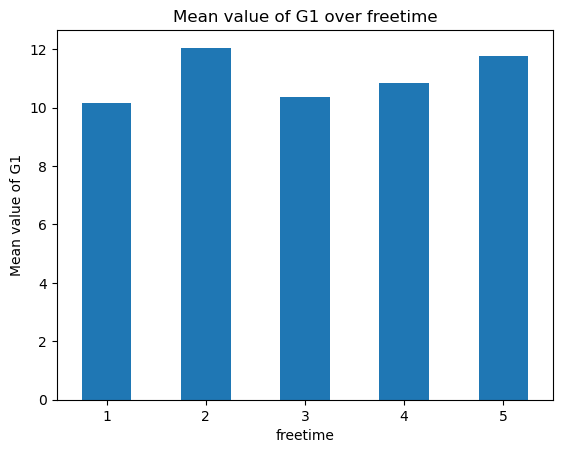

In [254]:
df.groupby('freetime')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over freetime')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Dalla distribuzione e dal confronto dei valori medi, possiamo concludere che gli studenti con tempo libero dopo la scuola molto basso hanno un voto peggiore, il che è ragionevole perché possono essere impegnati con l'allenamento sportivo o la scuola musicale (o qualsiasi altra cosa) e non hanno abbastanza tempo di studiare.

#### L'educazione della madre

Ora passiamo a *Medu* che significa istruzione della madre (0 - nessuna, 1 - istruzione primaria (4° grado), 2 – dal 5° al 9° grado, 3 – istruzione secondaria o 4 – istruzione superiore)

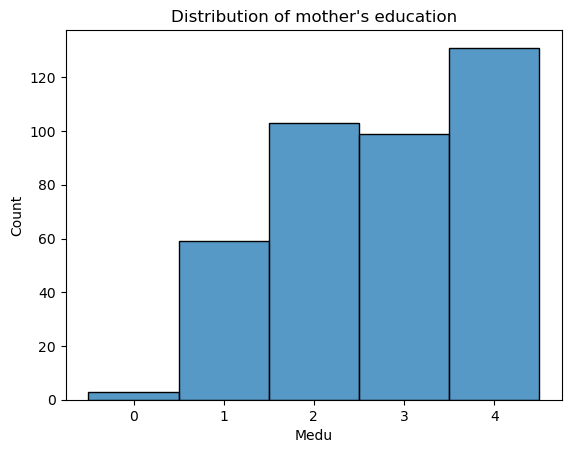

,Medu
4,0.331646
2,0.260759
3,0.250633
1,0.149367
0,0.007595


In [255]:
sns.histplot(df['Medu'], discrete=True)
plt.title('Distribution of mother\'s education')
plt.show()
df['Medu'].value_counts(normalize=True).to_frame()

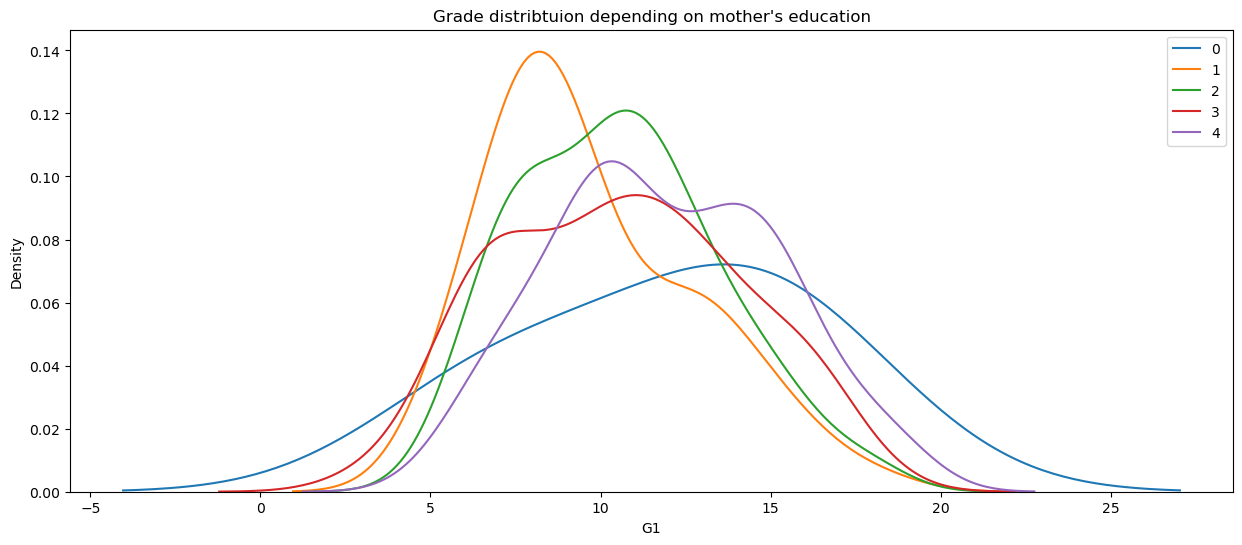

In [256]:
plt.figure(figsize=(15,6))
for medu, grouped_data in df.groupby('Medu'):
    sns.kdeplot(grouped_data['G1'], label=medu)
plt.legend()
plt.title('Grade distribtuion depending on mother\'s education')
plt.show()

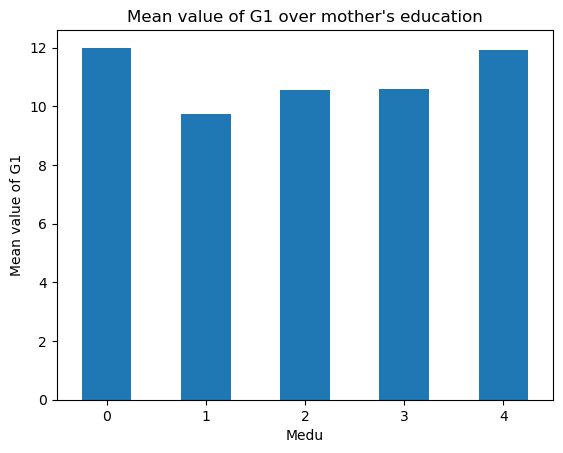

In [257]:
df.groupby('Medu')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over mother\'s education')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Il campione per gli studenti, le cui madri non hanno alcuna istruzione, è troppo piccolo. Quindi possiamo lasciarlo cadere dalla considerazione. Sulla base di altre osservazioni, possiamo concludere che maggiore è il livello di istruzione della madre, migliore è il voto.

#### Supporto educativo extra

Un'altra feature importante è *schoolsup* - supporto educativo extra (sì o no). Diamo un'occhiata e scopriamo quanti studenti ricevono un sostegno educativo extra.

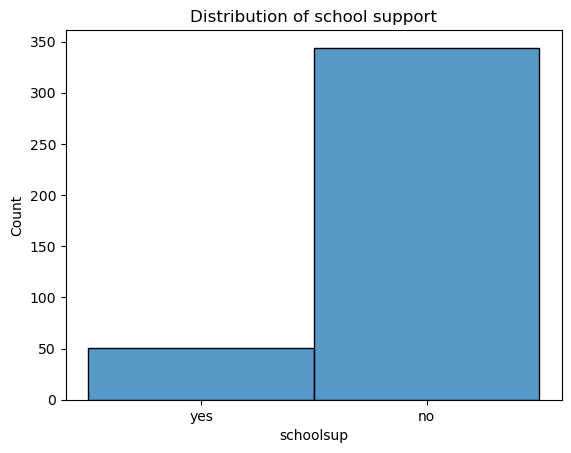

,schoolsup
no,0.870886
yes,0.129114


In [258]:
sns.histplot(df['schoolsup'], discrete=True)
plt.title('Distribution of school support')
plt.show()
df['schoolsup'].value_counts(normalize=True).to_frame()

Solo il 13% degli studenti riceve un sostegno educativo extra. Possiamo presumere che siano piuttosto scarsi in matematica, quindi devono seguire lezioni aggiuntive e probabilmente il loro voto dovrebbe essere inferiore.

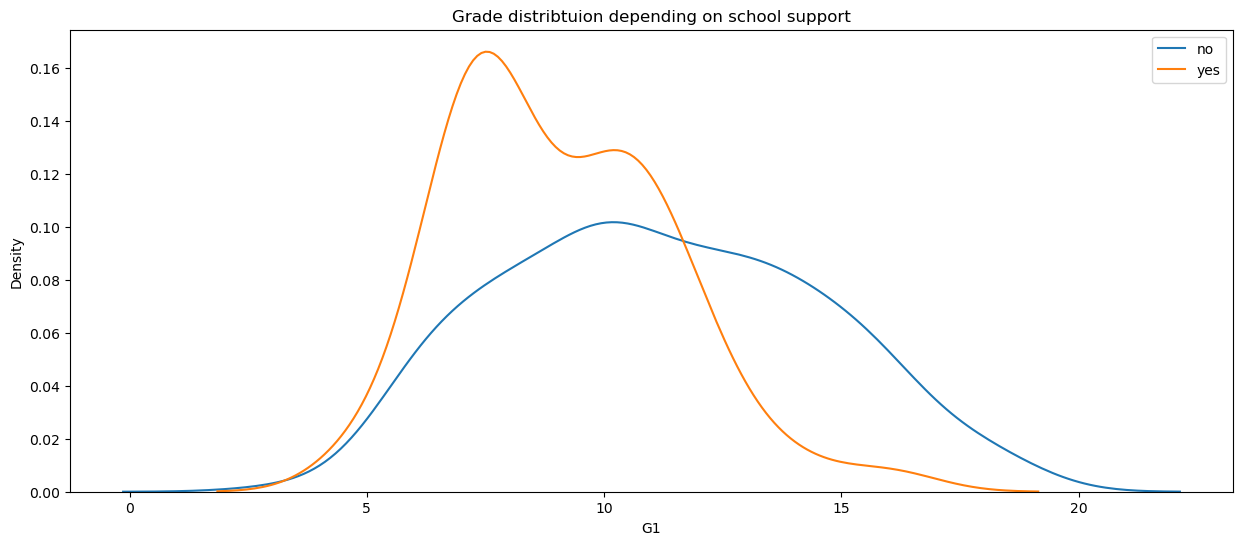

In [132]:
plt.figure(figsize=(15,6))
for schoolsup, grouped_data in df.groupby('schoolsup'):
    sns.kdeplot(grouped_data['G1'], label=schoolsup)
plt.legend()
plt.title('Grade distribtuion depending on school support')
plt.show()

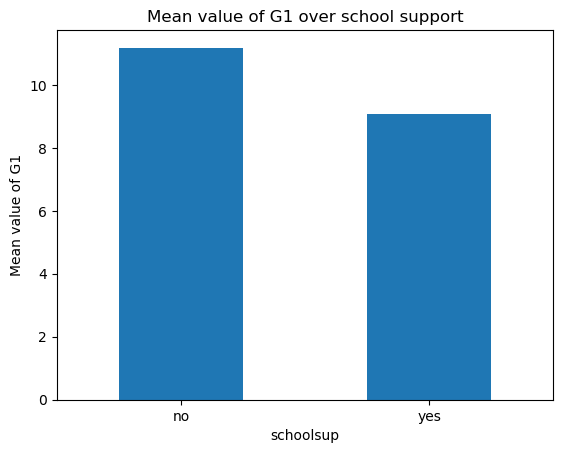

In [133]:
df.groupby('schoolsup')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over school support')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Sì, la supposizione era corretta. Gli studenti, che non hanno un sostegno educativo extra, hanno voti medi più alti.

#### Study time

Un'altra feature, riconosciuta come importante da entrambi gli algoritmi, è *studytime* - tempo di studio settimanale (1 - <2 ore, 2 - da 2 a 5 ore, 3 - da 5 a 10 ore o 4 - >10 ore). Diamo un'occhiata a quante ore alla settimana studiano.

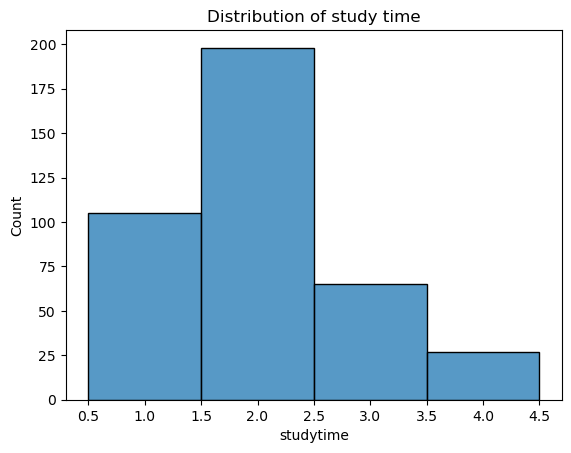

,studytime
2,0.501266
1,0.265823
3,0.164557
4,0.068354


In [134]:
sns.histplot(df['studytime'], discrete=True)
plt.title('Distribution of study time')
plt.show()
df['studytime'].value_counts(normalize=True).to_frame()

Il 50% degli studenti studia da 2 a 5 ore a settimana, il 27% - meno di 2 ore, il 7% - più di 10 ore. Sembra che agli studenti non piaccia passare il tempo a studiare. Ora possiamo verificare come influisce sul loro voto. Possiamo supporre che più ore di studio - il voto più alto.

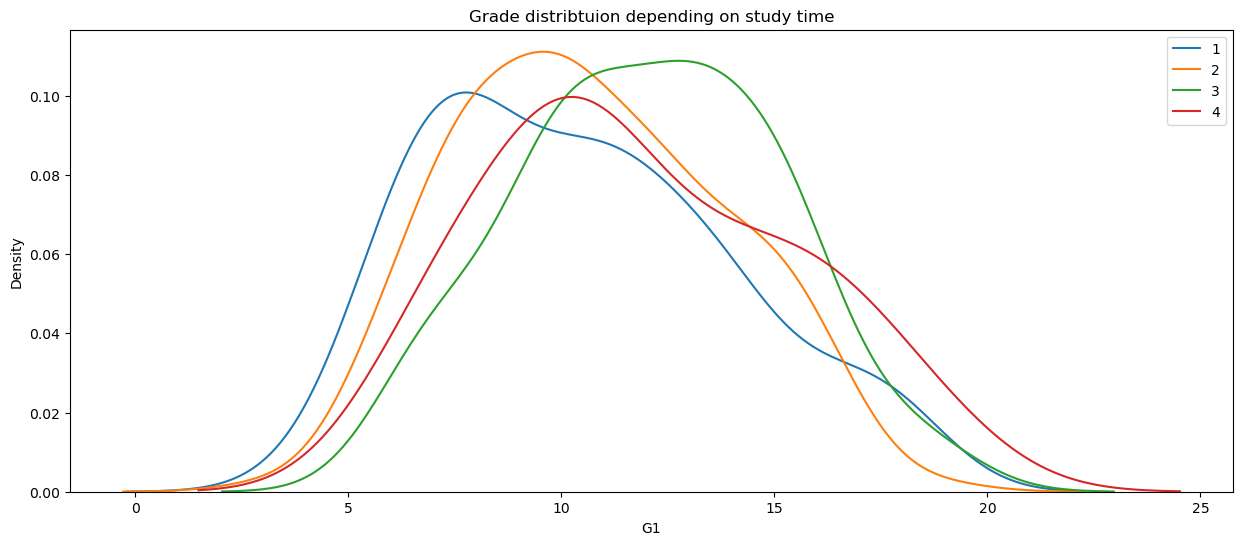

In [135]:
plt.figure(figsize=(15,6))
for studytime, grouped_data in df.groupby('studytime'):
    sns.kdeplot(grouped_data['G1'], label=studytime)
plt.legend()
plt.title('Grade distribtuion depending on study time')
plt.show()

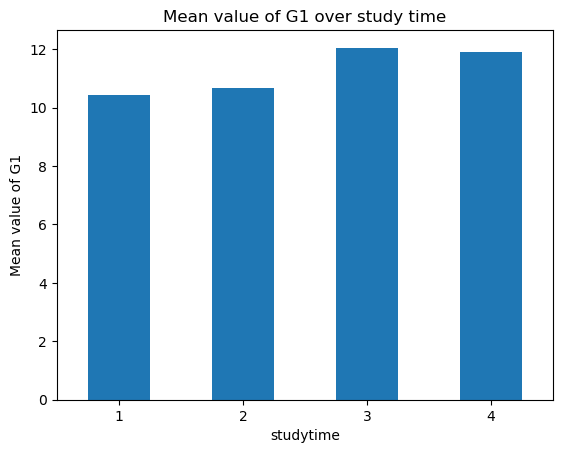

In [136]:
df.groupby('studytime')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over study time')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

La supposizione era giusta. Gli studenti che studiano più di 5 ore a settimana ottengono un voto più alto rispetto a quelli che studiano meno di 5 ore.

#### Absences

Finora abbiamo considerato le Features, che sono state definite "importanti" da entrambi i metodi utilizzati nel paragrafo precedente. Controlliamo la funzione *Absences*. Sulla base della foresta casuale, questa feature ha la massima importanza, ma il suo peso nella linear regression era basso.

Abbiamo già visto la distribuzione delle *absences*, ma facciamolo di nuovo per avere tutte le informazioni in un unico posto.

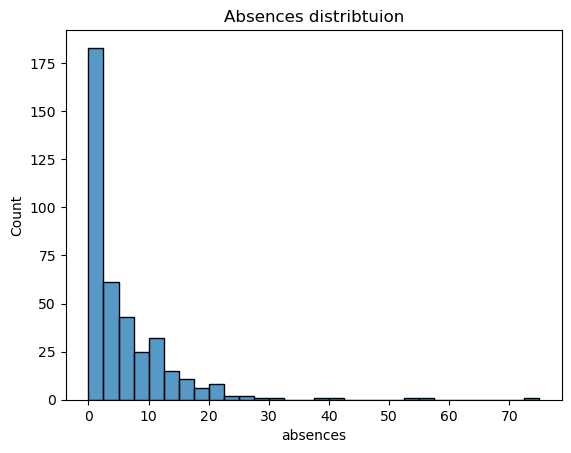

In [137]:
sns.histplot(df['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

Inoltre, abbiamo già calcolato la correlazione lineare tra assenze e voto. Il valore è -0,031. Significa che non esiste una correlazione lineare tra loro. Tracciamo G1 rispetto alle assenze, forse saremo in grado di rilevare un altro tipo di dipendenza.

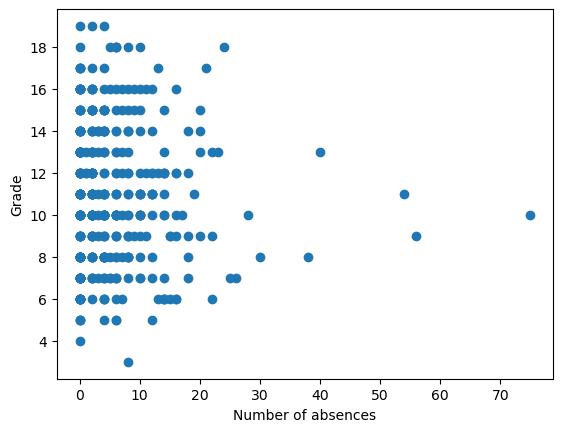

In [138]:
plt.scatter(df['absences'], df['G1'])
plt.xlabel('Number of absences')
plt.ylabel('Grade')
plt.show()

Guardando questo plot, è difficile concludere qualcosa.

In base al buon senso, gli studenti con un numero elevato di assenze dovrebbero avere un voto inferiore. Forse inizia dopo una certa soglia. Scegliamo 4 soglie per le assenze e confrontiamo il voto degli studenti che hanno più e meno assenze rispetto a quella soglia: 0 assenze, 5, 10 e 20.

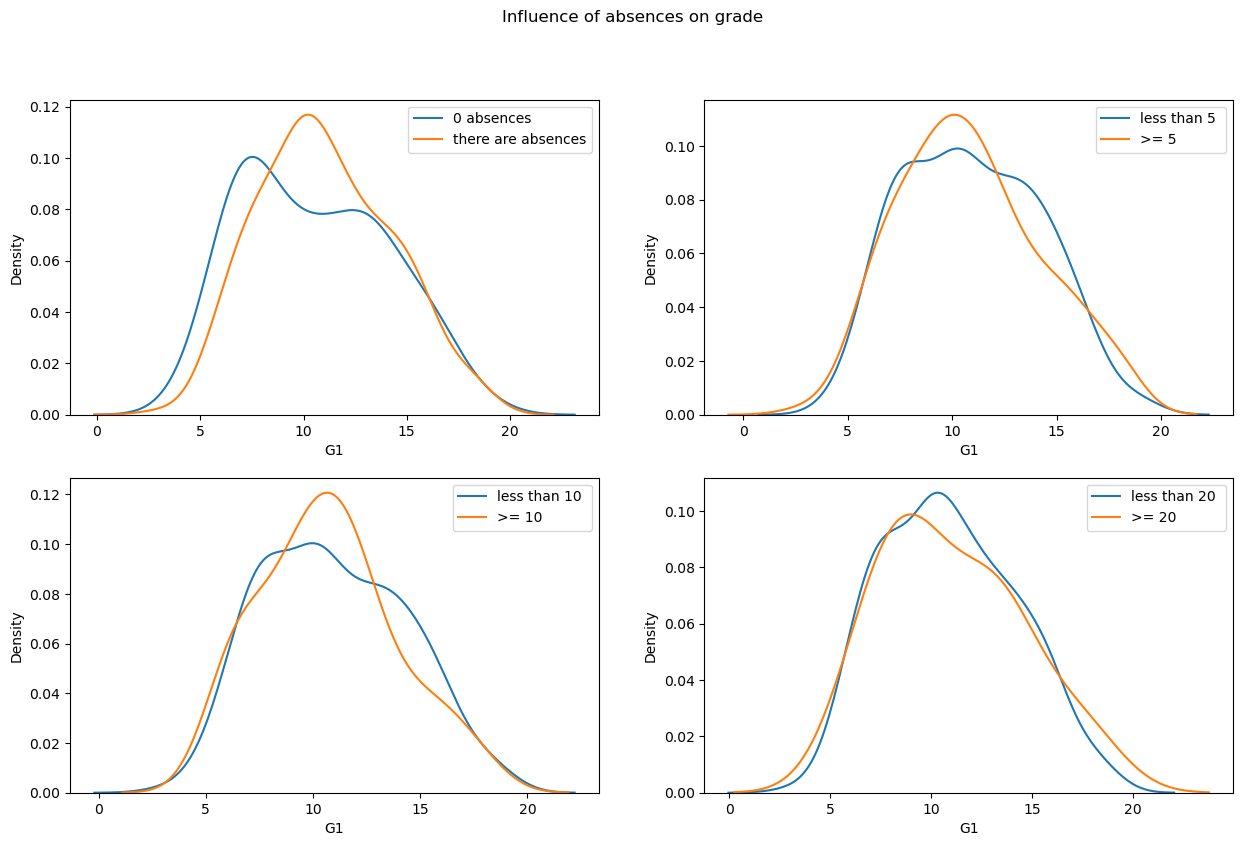

In [139]:
_, axes = plt.subplots(2, 2, figsize=(15,9))
_.suptitle('Influence of absences on grade')
sns.kdeplot(df.query('absences == 0')['G1'], label='0 absences', ax=axes[0, 0])
sns.kdeplot(df.query('absences > 0')['G1'], label='there are absences', ax=axes[0, 0])
axes[0, 0].legend()

sns.kdeplot(df.query('absences < 5')['G1'], label='less than 5 ', ax=axes[0, 1])
sns.kdeplot(df.query('absences >= 5 ')['G1'], label='>= 5', ax=axes[0, 1])
axes[0, 1].legend()

sns.kdeplot(df.query('absences < 10')['G1'], label='less than 10 ', ax=axes[1, 0])
sns.kdeplot(df.query('absences >= 10 ')['G1'], label='>= 10', ax=axes[1, 0])
axes[1, 0].legend()

sns.kdeplot(df.query('absences < 20')['G1'], label='less than 20 ', ax=axes[1, 1])
sns.kdeplot(df.query('absences >= 20 ')['G1'], label='>= 20', ax=axes[1, 1])
axes[1, 1].legend()
plt.show()

Da queste distribuzioni possiamo concludere che il numero di assenze non influisce sul voto.

È strano che Random Forest abbia considerato questa feature importante. Inoltre, Random Forest considerava features importanti *sex* e *age*, ma nella nostra analisi, nella sezione 2.1.3, abbiamo scoperto che non lo è. Sulla base di ciò, possiamo concludere che il calcolo dell'importanza delle features basato sui coefficienti di regressione lineare è più affidabile per il nostro set di dati.

#### Conclusioni

1. Gli studenti che non hanno precedenti bocciature hanno un voto migliore.
2. Gli studenti con poco *freetime* dopo la scuola hanno un voto inferiore.
3. L'istruzione della madre influisce sul voto. Più alto è il livello di istruzione della madre, migliore è il voto.
4. Gli studenti che usufruiscono di un sostegno didattico extra hanno un voto inferiore.
5. Gli studenti che studiano più di 5 ore settimanali ottengono un voto più alto rispetto a quelli che studiano meno di 5 ore.
6. Il numero di assenze non influisce sul voto.
7. Poiché *absences*, *age* and *sex* erano considerate features importanti dalla Random Forest, ma in realtà non lo sono, possiamo concludere che il calcolo dell'importanza delle features basato sui coefficienti di regressione lineare è più affidabile per il nostro set di dati, perché importanti features della regressione lineare hanno mostrato che influenzano il voto.

## Data preprocessing

In questo paragrafo, prepareremo i nostri dati per costruire un modello di machine learning.

Come abbiamo detto nella sezione 2.1.1 tutti i gradi (G1, G2, G3) hanno una correlazione lineare molto forte, e nella fase EDA, abbiamo considerato solo G1. Continueremo a considerare solo G1 anche in fase di modellazione.

### Matrix of features e vettore di variabile dipendente

Abbiamo 30 funzioni, tutte le colonne tranne indice e voti. Il nostro obiettivo è G1.

In [140]:
features = df.copy().drop(['G1', 'G2', 'G3'], axis=1)
target = df.copy()['G1']

In [141]:
print(features.shape)
print(target.shape)

(395, 30)
(395,)


In [142]:
features.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


Tutto è corretto.

### Encoding categorical data

Per L'encoding dei dati categorici useremo una codifica a caldo (OHE).

In [174]:
ohe_columns = []
for col in features.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features = pd.get_dummies(features, drop_first=True, columns=ohe_columns)

In [145]:
features.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,4,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,10,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,4,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Train-test split

Per stimare le prestazioni del modello in futuro, dobbiamo creare un test set. Conterrà il 20% di tutti i dati.

In [146]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=5)

In [147]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(316, 69)
(79, 69)
(316,)
(79,)


È importante che il set di test e train abbia una distribuzione simile del valore target. Se questa condizione non viene soddisfatta, il random seed in train_test_split deve essere modificato.

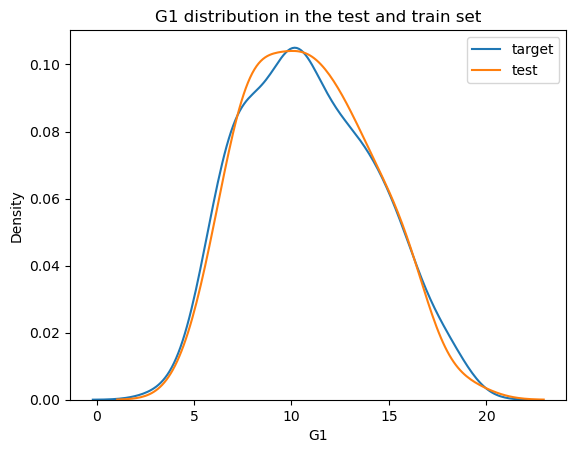

In [148]:
sns.kdeplot(target_train, label='target')
sns.kdeplot(target_test, label='test')
plt.legend()
plt.title('G1 distribution in the test and train set')
plt.show()

In [149]:
print('train mean value:', target_train.mean())
print('test mean value:', target_test.mean())

train mean value: 10.905063291139241
test mean value: 10.924050632911392


Le distribuzioni sembrano simili. Posso concludere che la scissione è stata eseguita con successo.

### Feature scaling

2 features numeriche dovrebbero essere standardizzate.

In [150]:
scaler = StandardScaler()
features_train[['age', 'absences']] = scaler.fit_transform(features_train[['age', 'absences']])
features_test[['age', 'absences']] = scaler.transform(features_test[['age', 'absences']])

In [151]:
features_train.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
48,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
247,4.232726,1.225475,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
42,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,-0.504729,1.713196,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
127,1.863998,-0.481547,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [152]:
features_test.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
306,2.653574,-0.725407,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
343,0.284847,-0.725407,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
117,-0.504729,-0.725407,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50,-0.504729,-0.481547,0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
316,1.074423,-0.725407,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


La standardizzazione è stata eseguita con successo.

### Feature engineering

Non penso che sia una buona idea creare nuove features nel nostro set di dati perché le features qui sono abbastanza chiare. Quindi il Feature engineering in questo notebook implicherà l'abbandono di features che non hanno alcuna influenza sull'obiettivo (queste features sono inutili per il modello).

La procedura sarà la seguente:
1. Definire l'importanza della feature come abbiamo fatto nella sezione 2.2.2, ma usando solo il train set.
2. Imposta una soglia per l'importanza delle features, le features non importanti vengono eliminate.
3. Costruire un modello semplice (useremo KNN) e valutarne le prestazioni tramite cross validation.
4. Ripetere i passaggi 2 e 3 per trovare il modello migliore.

Costruiamo un modello e troviamo l'importanza delle features.

In [153]:
regressor_lr = LinearRegression()
regressor_lr.fit(features_train, target_train)

LinearRegression()

In [154]:
feature_importances = pd.concat([pd.Series(features_train.columns, name='features'), 
                                 pd.Series(regressor_lr.coef_, name='importance')],
                                axis=1)

feature_importances['importance'] = abs(feature_importances['importance'])

feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [155]:
feature_importances.head()

,features,importance
0,failures_3,4.125497
1,famrel_2,3.695198
2,freetime_5,3.061721
3,Medu_2,2.570433
4,Medu_3,2.561818


Ora possiamo fare un ciclo per valutare diverse soglie di importanza.

In [157]:
results_features = pd.DataFrame({'threshold' : [], 'number_of_features' : [], 'mse' : []})

for threshold in np.arange(0, 4, 0.05):
    features_truncated = features_train.copy()

    for col in features_truncated.columns:
        if feature_importances.loc[feature_importances['features'] == col]['importance'].values < threshold:
            features_truncated = features_truncated.drop(col, axis=1)

    y_pred = cross_val_predict(KNeighborsRegressor(n_neighbors=6), features_truncated, target_train, cv=5)
    mse = mean_squared_error(target_train, y_pred)
    if results_features.empty or results_features['number_of_features'].iloc[-1] > features_truncated.shape[1]:
        results_features = pd.concat([results_features, pd.DataFrame([[threshold, features_truncated.shape[1], mse]], columns=results_features.columns)])

In [158]:
results_features.sort_values(by='mse').head()

,threshold,number_of_features,mse
0,0.95,30.0,10.561445
0,0.90,32.0,10.614539
0,0.45,41.0,10.755011
0,1.00,28.0,10.772767
0,0.50,39.0,10.895218


Il miglior mean_squared_error è stato ottenuto utilizzando una soglia di 0,9 con 32 funzioni. Abbandoniamo le features non necessarie.

In [159]:
features_train_truncated = features_train.copy()

for col in features_train_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.9:
        features_train_truncated = features_train_truncated.drop(col, axis=1)

In [160]:
features_train_truncated.head()

,sex_M,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
48,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
247,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
42,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
237,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
127,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


E lo stesso per il test set.

In [161]:
features_test_truncated = features_test.copy()

for col in features_test_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.9:
        features_test_truncated = features_test_truncated.drop(col, axis=1)

In [163]:
features_test_truncated.head()

,sex_M,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
306,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
343,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
50,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
316,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Modeling

L'obiettivo principale di questa parte è costruire un modello in grado di prevedere il voto degli studenti.

Sarà fatto in 3 passi:
1. Addestramento del modello.
2. Valutazione delle prestazioni del modello sul test set.
3. Verifica dell'adeguatezza del modello (confronto con un modello costante).

### Training del modello

Per il training, utilizzeremo XGBRegressor dalla libreria xgboost. La scelta si basa sul fatto che solitamente il gradient boosting mostra i migliori risultati sui dati della tabella.

GridSearchCV verrà utilizzato per ottimizzare gli iperparametri del modello.

In [164]:
parameters = {'max_depth' : [2, 3, 4],
              'n_estimators' : [20, 30, 50, 75, 100],
              'eta' : [0.5, 0.3, 0.1, 0.05]}
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               verbose=1)

grid_search_xgb.fit(features_train_truncated, target_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [165]:
grid_search_xgb.best_params_

{'eta': 0.5, 'max_depth': 2, 'n_estimators': 20}

In [166]:
grid_search_xgb.best_score_

-8.925028194937594

The optimal hyperparameters were defined. Now we can train the model.

In [167]:
regressor = XGBRegressor(max_depth=2, 
                         n_estimators=20,
                         eta=0.5,
                         random_state=42)
regressor.fit(features_train_truncated, target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.5, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

### Valutazione delle prestazioni del modello sul test set

Per la valutazione verrà utilizzato RMSE (root mean squared error).

In [168]:
target_pred = regressor.predict(features_test_truncated)

In [169]:
mean_squared_error(target_test, target_pred) ** 0.5

3.1955217027350007

In [170]:
mean_squared_error(target_train,  regressor.predict(features_train_truncated)) ** 0.5

2.439668739170064

Le prestazioni sul test se sono un po' peggiori rispetto al training test, ma è adeguato. Possiamo concludere che l'overfitting non è avvenuto.

Diamo un'occhiata alla curva di apprendimento.

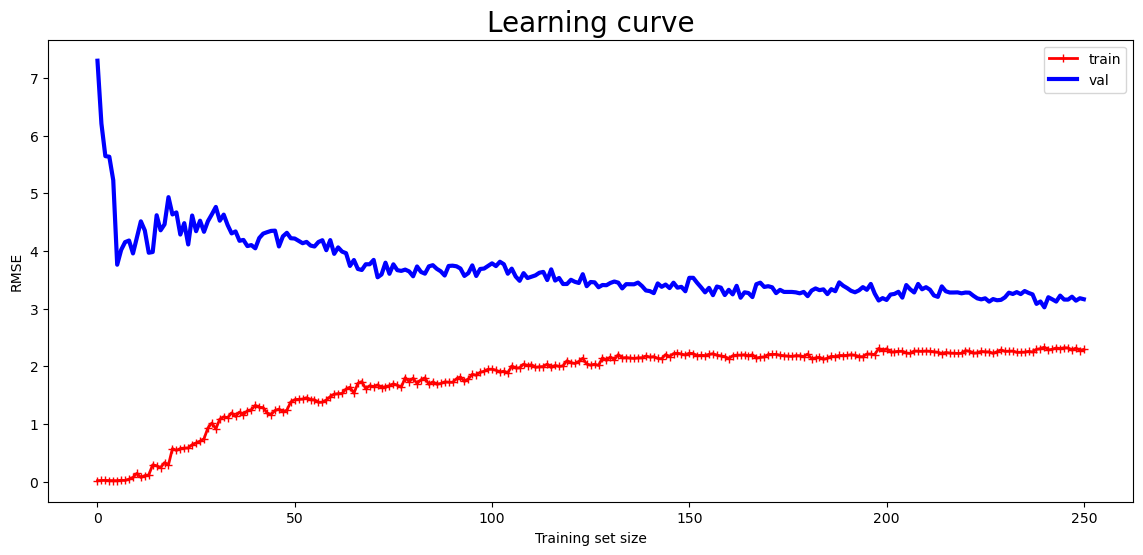

In [171]:
X_train, X_val, y_train, y_val = train_test_split(features_train_truncated, target_train, test_size = 0.2, random_state=100500)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    regressor.fit(X_train[:m], y_train[:m])
    y_train_predict = regressor.predict(X_train[:m])
    y_val_predict = regressor.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.figure(figsize=(14,6))
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning curve', fontsize = 20)
plt.show()

Idealmente, dovremmo avere lo stesso RMSE sui set di addestramento e di convalida. Le curve tendono a convergere, ma non ci sono dati sufficienti. Se il set di dati fosse più grande, le previsioni sarebbero più precise.

### Model adequacy

Un modello può essere riconosciuto come adeguato o significativo se le sue prestazioni sono migliori delle prestazioni di un modello costante (il cui output è sempre lo stesso (ad esempio, valore medio o mediano). Per confronto useremo RMSE. Il nostro modello ha un RMSE di 3,24 nel test.

Controlliamo il modello, che prevede sempre il valore medio.

In [172]:
regressor_mean = DummyRegressor(strategy='mean')
regressor_mean.fit(features_train_truncated, target_train)

DummyRegressor()

In [173]:
mean_squared_error(target_test, regressor_mean.predict(features_test_truncated)) ** 0.5

3.129226832177046

**Il risultato ottenuto dal modello costante mostra una lieve miglior performance. Tuttavia, non sono stato in grado di sviluppare un modello accettabile per la previsione dei voti degli studenti. Una possibile ragione potrebbe essere la mancanza di dati, altre possibili ragioni potrebbero essere legate all'algoritmo utilizzato per la modellazione, alle feature selezionate o ai parametri scelti**